In [1]:
from __future__ import absolute_import
import os
import sys
sys.path.append('../')

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from helpers import plots

## Analysis of multiple MRI protocols

In [2]:
train_directory = '../data/Brats17TrainingData/'
valid_directory = '../data/Brats17ValidationData/'
test_directory = '../data/Brats17TestingData/'

In [3]:
def read_img(path):
    image = sitk.ReadImage(path, sitk.sitkUInt16)
    return sitk.GetArrayFromImage(image)

def normalize(s, image):
    return s / image.max()

#### Load image of each mri protocol

In [4]:
sample_dir = 'Brats17_TCIA_314_1'
sample_path = train_directory + 'HGG/' + sample_dir + '/' + sample_dir
t2_img = read_img(sample_path + '_t2.nii.gz')
t1ce_img = read_img(sample_path + '_t1ce.nii.gz')
flair_img = read_img(sample_path + '_flair.nii.gz')
seg_img = read_img(sample_path + '_seg.nii.gz')
# test if shape of images is same
seg_img.shape == t2_img.shape == t1ce_img.shape == flair_img.shape

True

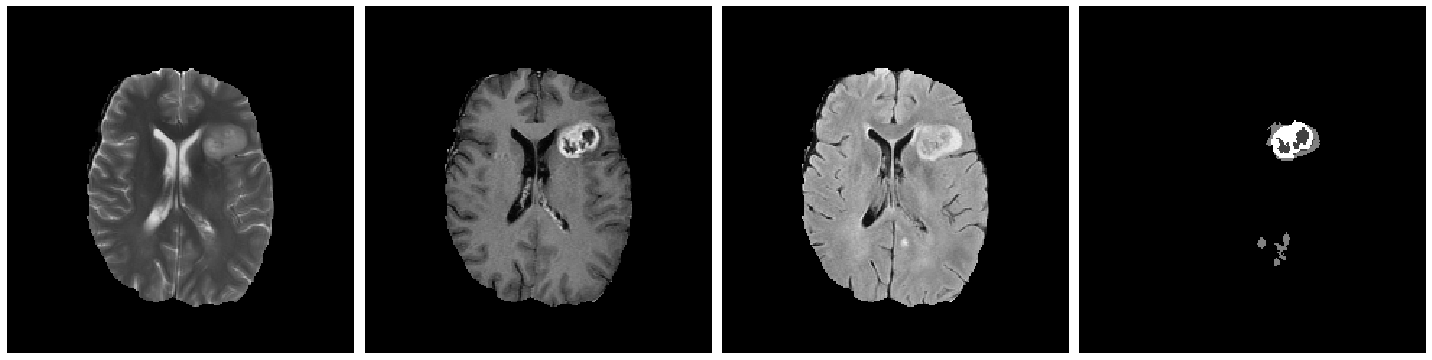

In [5]:
t2_slice = t2_img[80]
t1ce_slice = t1ce_img[80]
flair_slice = flair_img[80]
seg_slice = seg_img[80]

plots.plot_gray_images(np.array([t2_slice, t1ce_slice, flair_slice, seg_slice]), 4)

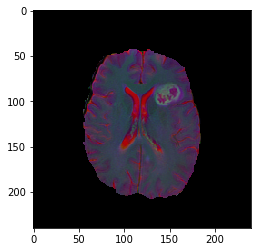

In [6]:
img = sitk.GetImageFromArray(np.array([t2_slice, t1ce_slice, flair_slice]), isVector=False)
vol = np.dstack(np.array([normalize(t2_slice, t2_img), 
                          normalize(t1ce_slice, t1ce_img), 
                          normalize(flair_slice,flair_img)]))
plt.imshow(vol)

## Algorithm to preprocess multiple images to rgb image

In [12]:
def process_data(directory, postfixes, saving_directory, interval = (0, 1)):
    file_names = os.listdir(directory)
    random.seed(5)
    random.shuffle(file_names)
    file_names = file_names[int(len(file_names) * interval[0]): int(len(file_names) * interval[1])]
    iterator = 0
    for name in file_names:
#       read images
        images = [sitk.ReadImage(os.path.join(directory , name, name + postfix), sitk.sitkFloat32)
                for postfix in postfixes
                ]
        image_seg = sitk.ReadImage(os.path.join(directory , name, name +'_seg.nii.gz'))
#       transform image to n-dim numpy arrays
        vols = [sitk.GetArrayFromImage(image) for image in images]
        vol_seg = sitk.GetArrayFromImage(image_seg)
#       get slices with labels from image
        imgs_slices = [slice_images(vol, vol_seg, 50, 130, 1) for vol in vols]
        slices_seg = slice_images(vol_seg, vol_seg, 50, 130, 1)
#       save image
        for idx, (images, segmentation) in enumerate(zip(zip(*imgs_slices), slices_seg)):
            iterator += 1
            only_images = [img for (img, label) in images]
            label = segmentation[1]
            normalized_images = [normalize(s, vol) for s, vol in zip(only_images,vols)] 
            
            image_name = name + '_' + str(idx) + '.png'
            save_image(normalized_images, os.path.join(saving_directory, str(label), image_name))
            print(os.path.join(saving_directory, str(label), image_name))
        print(iterator, ' generated images')
        
def slice_images(image_vol, image_seg_vol, from_z, to_z, step):
    return [(image_vol[z], get_label(image_seg_vol[z])) for z in range(from_z, to_z, step)]

def normalize(s, image):
    return s / image.max() * 255        
        
def get_label(vol):
    return 1 if any(vol.flatten() > 0) else 0

def save_image(image, filename):
    
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory) 
    
    vol = np.dstack(image)
    vol = vol.astype('uint8')
    im = Image.fromarray(vol)
    im.save(filename)
    
#     img = sitk.GetImageFromArray(image, isVector=False)
#     sitk.WriteImage(img, filename, True)

### Dividing MRI images to two sets train and validation. Preprocessing this sets to slices

1. Divide images to train and validation
2. Read image
3. Normalize images intensities to 0-255
4. Slice 3D MRI image to 2D images
5. Save images as png

In [13]:
process_data(train_directory + 'HGG', ['_t2.nii.gz','_t1ce.nii.gz','_flair.nii.gz'], '../data/train/t2_t1ce_flair', (0, 0.8))

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_0.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_1.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_2.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_3.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_4.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_5.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_6.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_7.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_8.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_9.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_10.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_11.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_12.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_13.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_14.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_15.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVG_1_16.png
../data/train/t2_t1ce_flair/1/Brats17_CBI

../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_73.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_74.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_75.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_76.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_77.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_78.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_BHB_1_79.png
160  generated images
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_0.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_1.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_2.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_3.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_4.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_5.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_6.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_168_1_7.png
../data/train/t2_t1ce_fla

../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_73.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_74.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_75.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1_76.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_448_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_71.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_72.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_73.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_74.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AXQ_1_75.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_401_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_401_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_401_1_73.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_401_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AAP_1_71.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_55.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_499_1

../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_71.png
../data/train/t2_t1ce_flair/1/Brats17_2013_19_1_72.png
../data/tr

../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_53.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_54.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_55.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_607_1

../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_2013_20_1_71.png
../data/tr

../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_55.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATX_1_71.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASH_1_72.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_396_1_55.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_396_1

../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_53.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_54.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_55.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_605_1

../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_2013_14_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_2013_14_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_2013_14_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_2013_14_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_2013_14_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_2013_14_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_2013_14_1_68.png
../data/tr

../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_54.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_55.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASE_1_70.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQP_1_55.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_184_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_184_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASK_1_52.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_33.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_34.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_35.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_36.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_37.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_38.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_39.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_40.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_41.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_42.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_43.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_44.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_45.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_46.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_47.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_48.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1_49.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_280_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATF_1_47.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATF_1_48.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATF_1_49.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATF_1_50.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATF_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATF_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATF_1_53.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ATF_1_54.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_300_1_47.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_300_1_48.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_300_1_49.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_300_1_50.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_300_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_300_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_300_1_53.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_300_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_479_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AUQ_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AUQ_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AUQ_1_53.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AUQ_1_54.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AUQ_1_55.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_331_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASU_1_53.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_314_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVJ_1_55.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_APR_1_53.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_436_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_208_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_278_1_44.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_45.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_46.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_47.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_48.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_49.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_50.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_278_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQJ_1_53.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_361_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_242_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASG_1_51.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_37.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_38.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_39.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_40.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_41.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_42.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_43.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_44.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_45.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_46.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_47.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_48.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_49.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_50.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1_53.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_171_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_335_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ABO_1_55.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQZ_1_54.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_231_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_138_1_47.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_48.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_49.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_50.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_53.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_54.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1_55.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_138_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ATD_1_56.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_35.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_36.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_37.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_38.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_39.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_40.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_41.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_42.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_43.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_44.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_45.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_46.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_47.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_48.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_49.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_50.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_247_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_131_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASY_1_50.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_ASY_1_51.png
../data/train/t2_t1ce_flair/0/B

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_0.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_1.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_2.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_3.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_4.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_5.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_6.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_7.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_8.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_9.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_10.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_11.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_12.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_13.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_14.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_15.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_16.png
../data/train/t2_t1ce_flair/0/Brats17_2013_2_1_17.png
../data/train/t2_t1ce_flair/0/Brats17_

../data/train/t2_t1ce_flair/0/Brats17_TCIA_378_1_0.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_378_1_1.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_378_1_2.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_378_1_3.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_378_1_4.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_378_1_5.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_378_1_6.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_7.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_8.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_9.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_10.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_11.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_12.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_13.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_14.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_15.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_16.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_378_1_17.png
..

../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_72.png
../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_73.png
../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_74.png
../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_75.png
../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_76.png
../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_77.png
../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_78.png
../data/train/t2_t1ce_flair/1/Brats17_2013_21_1_79.png
7520  generated images
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_0.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_1.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_2.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_3.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_4.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_5.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_6.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_7.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFB_1_8.png
../data/train/t2_t1ce_flair/1/Bra

../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AYA_1_73.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_71.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_283_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_283_1

../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_73.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1_74.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_121_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_71.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_72.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_73.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_74.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_75.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_76.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_77.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_274_1_78.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_274_1_79.png
8160  generated images
../data/train/t2_t1ce_fla

../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_186_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_186_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_186_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_186_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_186_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_186_1_73.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_186_1

../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZH_1_72.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQR_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_73.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQR_1_74.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_199_1

../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_111_1

../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_56.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_57.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_58.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_59.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_60.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_61.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_62.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_63.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_64.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_65.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_66.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_67.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_68.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_69.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_70.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_71.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1_72.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_471_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_66.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_67.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_68.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_69.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1_70.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_133_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_55.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_56.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_57.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_58.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_59.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_60.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_61.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_62.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_63.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_64.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_65.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ASV_1_66.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQO_1_54.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_2013_22_1_53.png
../data/tr

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_52.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_53.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_54.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQD_1_55.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQT_1_51.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQT_1_52.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AQT_1_53.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_BFP_1_52.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1_51.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_498_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_37.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_38.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_39.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_40.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_41.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_42.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_43.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_44.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_45.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_46.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_47.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_48.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_49.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_50.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AYW_1_51.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_265_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AWH_1_35.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_419_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_147_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_16.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_17.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ALN_1_32.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_375_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOD_1_34.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/0/Brats17_CBICA_AOP_1_19.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AOP_1_20.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AOP_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AOP_1_35.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AVV_1_34.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AZD_1_31.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZD_1_32.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZD_1_33.png
../data/train/t2_t1ce_flair/0/Brats17_CBICA_AZD_1_34.png
../data/train/t2_t1ce_flair/0/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_ANP_1_36.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AME_1_34.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQG_1_34.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_179_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_35.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1_36.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_473_1

../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_328_1

../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_17.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_18.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_CBICA_AQY_1_33.png
../data/train/t2_t1ce_flair/1/B

../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_19.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_20.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_21.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_22.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_23.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_24.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_25.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_26.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_27.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_28.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_29.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_30.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_31.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_32.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_33.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_34.png
../data/train/t2_t1ce_flair/1/Brats17_TCIA_406_1_35.png
../data/train/t2_t1ce_flair/0/Brats17_TCIA_406_1

In [16]:
process_data(train_directory + 'HGG', ['_t2.nii.gz','_t1ce.nii.gz','_flair.nii.gz'], '../data/valid/t2_t1ce_flair', (0.8, 1))

../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_469_1_17.png
..

../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQN_1_73.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQN_1_74.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQN_1_75.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQN_1_76.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQN_1_77.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQN_1_78.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQN_1_79.png
160  generated images
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_343_1_9.png
../data/valid/t2_t1ce_flair/1

../data/valid/t2_t1ce_flair/0/Brats17_TCIA_218_1_73.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_218_1_74.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_218_1_75.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_218_1_76.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_218_1_77.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_218_1_78.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_218_1_79.png
320  generated images
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AOO_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AOO_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AOO_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AOO_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AOO_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AOO_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AOO_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AOO_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AOO_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AOO_1_9.png
../data/valid/t2_t1ce_flai

../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AMH_1_77.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AMH_1_78.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_AMH_1_79.png
480  generated images
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_4.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_5.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_6.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_201_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_201_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_201_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_201_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_201_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_201_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_201_1_13.png
../data/valid/t2_t1ce_flair/1/Bra

../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_4.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_5.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_6.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_7.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_8.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_9.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_10.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_11.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_12.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_13.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_14.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_15.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ATB_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_CBI

../data/valid/t2_t1ce_flair/0/Brats17_TCIA_118_1_78.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_118_1_79.png
800  generated images
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_4.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_5.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_6.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_18_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_18_1_15.

../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_27_1_17.png
../data/valid/t2_t1c

../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_4.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_5.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_6.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_7.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_8.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_9.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_10.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_11.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_12.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_13.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_14.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_15.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_16.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_25_1_17.png
../data/valid/t2_t1c

../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ATV_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_CBI

../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_296_1_17.png
..

../data/valid/t2_t1ce_flair/0/Brats17_2013_17_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_17_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_17_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_17_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_17_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_2013_17_1_17.png
../data/valid/t2_t1c

../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AWI_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_CBI

../data/valid/t2_t1ce_flair/0/Brats17_TCIA_332_1_74.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_332_1_75.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_332_1_76.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_332_1_77.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_332_1_78.png
../data/valid/t2_t1ce_flair/0/Brats17_TCIA_332_1_79.png
1920  generated images
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_BHK_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_BHK_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_BHK_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_BHK_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_BHK_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_BHK_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_BHK_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_BHK_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_BHK_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_BHK_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_BHK_1_10.png
../data/valid/t2_t1ce_fl

../data/valid/t2_t1ce_flair/0/Brats17_TCIA_277_1_79.png
2080  generated images
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_444_1_15.png
../data/valid/t2_t1ce_flair/1/Brats

../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_4.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_5.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_6.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_7.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_8.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_9.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_10.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_11.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_12.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_13.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_14.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_15.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_16.png
../data/valid/t2_t1ce_flair/0/Brats17_2013_26_1_17.png
../data/valid/t2_t1c

../data/valid/t2_t1ce_flair/1/Brats17_TCIA_372_1_78.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_372_1_79.png
2400  generated images
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ABM_1_14.png
../data/valid/t2_t1c

../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANI_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_CBI

../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_AQA_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_CBI

../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ANG_1_0.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ANG_1_1.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ANG_1_2.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ANG_1_3.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ANG_1_4.png
../data/valid/t2_t1ce_flair/0/Brats17_CBICA_ANG_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_CBICA_ANG_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_CBI

../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_377_1_17.png
..

../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_0.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_1.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_2.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_3.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_4.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_5.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_6.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_7.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_8.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_9.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_10.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_11.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_12.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_13.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_14.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_15.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_16.png
../data/valid/t2_t1ce_flair/1/Brats17_TCIA_460_1_17.png
..

**Train: 13440 images**

**Validation: 3360 images**

### Slices from one brain sample

In [3]:
def imshow(vol,title:str, ax=None):
    if ax:
        ax.imshow(vol)
        ax.axis('off')
        ax.set_title(title)
    else:
        plt.imshow(vol)
        plt.axis('off')
        plt.title(title)
def get_label_from_path(path):
    return '1' if path.find('/1/') > 0 else '0'

def pil_imread(path):
    im = Image.open(path)
    return np.array(im)

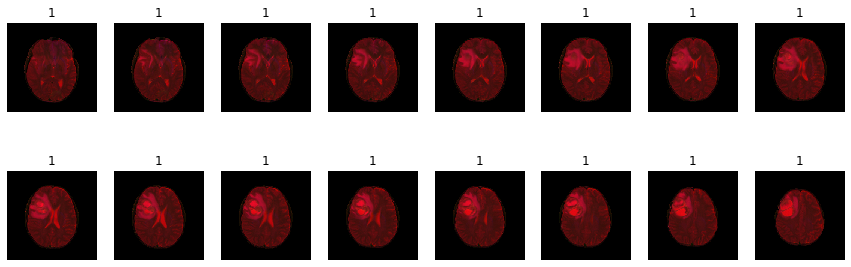

In [6]:
paths = iter([
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_17.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_20.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_22.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_24.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_26.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_28.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_31.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_33.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_35.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_37.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_39.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_41.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_43.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_45.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_49.png',
'../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_55.png'
])

fig, axs = plt.subplots(2, 8, figsize=(15, 5))
for path, ax in zip(paths, axs.flatten()):
    img = pil_imread(path)
    img = img * 1/255
    imshow(img,get_label_from_path(path),ax)

#### Decomposition rgb image to individual channles

(240, 240, 3)


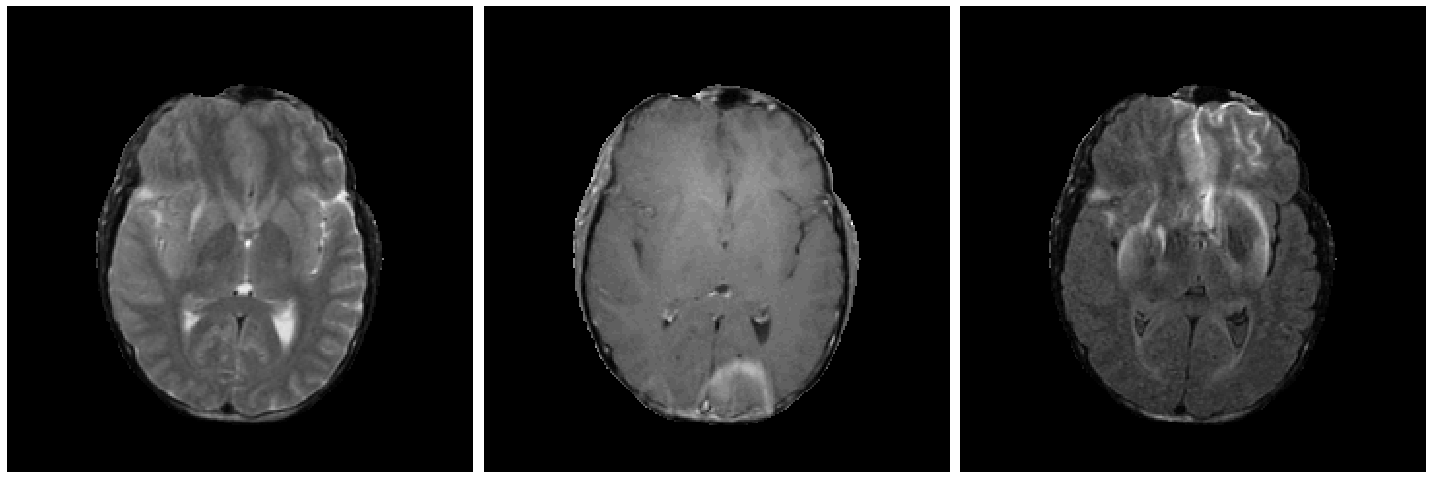

In [7]:
img = pil_imread('../data/train/t2_t1ce_flair/1/Brats17_TCIA_168_1_17.png')
print(img.shape)
plots.plot_rgb_decomposition(img)